# <span style="color:green"> ESERCITAZIONE 6 </span>

### <span style="color:blue"> INTRODUZIONE TEORICA </span>

Il modello di Ising è uno dei più studiati in tutta la meccanica statistica e viene introdotto per dare una spiegazione quantitativa del ferromegnetismo. Si suppone una griglia $N$-dimensionale, in cui ogni giunzione corrisponde a un dipolo magnetico con spin $\pm=1$ e per i dipoli sul bordo si applicano delle PBC, rendendo la griglia di fatto infinita. Attualmente il modello di Ising possiede una soluzione analitica solo per $dim={1, 2}$. In questa esercitazione trattiamo solo Ising unidimensionale.</br>
Secondo il modello, l'energia del sistema è fornita dall'Hamiltoniana:

\begin{equation}
H = -J \sum_{i}s_i s_{i+1} - h\sum_{i}s_i
\end{equation}

Dove $J$ rappresenta l'intensità di interazione tra due spin adiacenti e $h$ quella tra uno spin e il campo esterno. L'energia del sistema è minima quando tutti gli spin sono allineati, in questa configurazione si dice che il sistema è <b> magnetizzato </b>. Questa tendenza degli spin ad allinearsi viene ostacolata dalle oscillazioni del sistema, le quali possono casualmente ribaltare gli spin.
L'obiettivo dell'esercitazione 6 è calcolare le seguenti quantità in funzione di T nell'intervallo $[0.5, 2]$:
1. Energia interna: $U(N,T) = \langle H \rangle_{h=0}$
2. Capacità termica: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. Suscettività magnetica: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. Magnetizzazione: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

### Algoritmi usati

- <b> Metropolis </b>: Dando in input una configurazione di spin (file di nome config.spin), questa viene modificata casualmente tramite il ribaltamento di uno spin selezionato anch'esso casualmente. Se la mossa porta il sistema in una configurazione di energia più bassa (e quindi più probabile), viene automaticamente accettata; se così non fosse si procede al calcolo di: $A=\min [1, \exp^{-\beta(E_{new} - E_{old})}]$ e poi, estratto un numero $r$ da una distribuzione uniforme, se $r<A$ si accetta la mossa.

- <b> Gibbs </b>: L'algoritmo di Gibbs è un caso particolare dell'algoritmo di Metropolis dove ogni mossa proposta ha un'accettazione del 100%. A partire da una configurazione di spin, viene selezionato uno spin casualmente e viene riestratto, indipendentemente da quelli adiacenti. Se la nuova configurazione è energeticamente convieniente, lo spin viene flippato. In caso contrario, viene imposta la mossa contraria. Per il fatto di imporre sempre una mossa, l'algoritmo di Gibbs è più rapido.

#### ENERGIA INTERNA

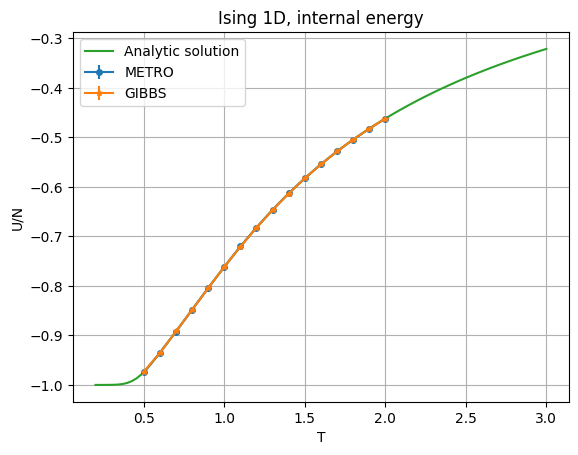

In [15]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

alg = ["METRO","GIBBS"]
marker = ['o','*']

for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("NSL_SIMULATOR/OUTPUT/"+alg[i]+"/total_energy.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i],markersize=4,label=alg[i])
    plt.grid(True)

plt.plot(T, e, label="Analytic solution")
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

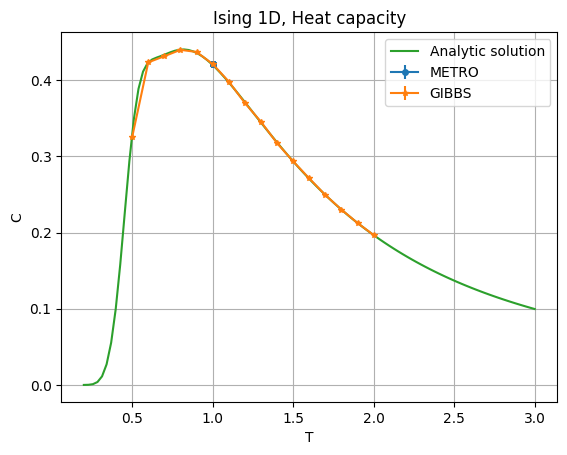

In [9]:
for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("NSL_SIMULATOR/OUTPUT/"+alg[i]+"/heat_capacity.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i],markersize=4,label=alg[i])
    plt.grid(True)

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label="Analytic solution")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()


#### MAGNETIZZAZIONE

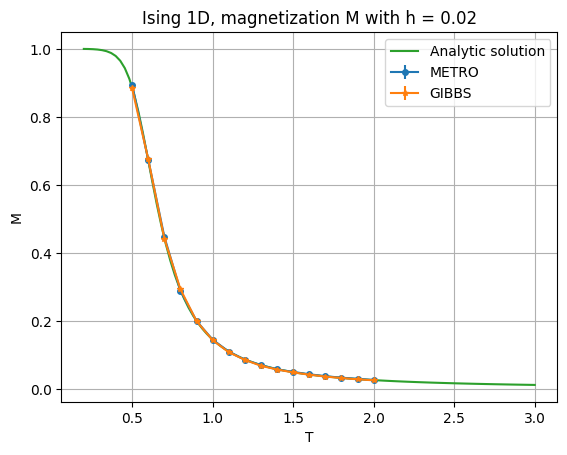

In [16]:
for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("NSL_SIMULATOR/OUTPUT/"+alg[i]+"/magnetization.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i],markersize=4,label=alg[i])
    plt.grid(True)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M, label="Analytic solution")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.show()



#### SUSCETTIBILITÀ MAGNETICA

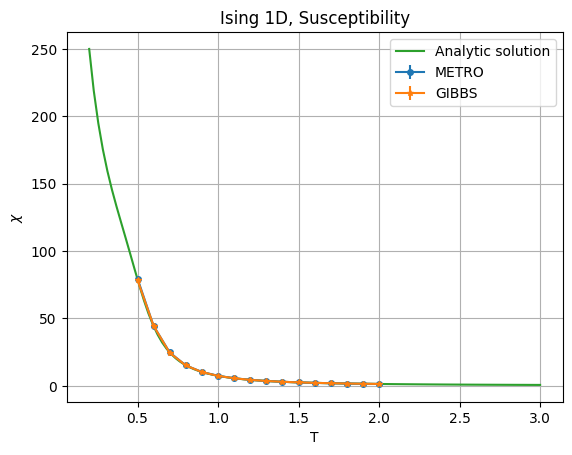

In [17]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("NSL_SIMULATOR/OUTPUT/"+alg[i]+"/susceptibility.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i],markersize=4,label=alg[i])

plt.grid(True)
plt.plot(T, X, label="Analytic solution")
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()


#### CONCLUSIONI

Notiamo subito come le simlazioni svolte con entrambi gli algoritmi seguano molto bene la curva teorica per tutte e quattro le grandezze. Questo mostra la validità sia dell'algoritmo $M(RT)^2$ sia dell'algoritmo di Gibbs; in particolare in questo caso è più conveniente usare quello di Gibbs perché, a parità di risultato, è computazionalmente più veloce.